In [87]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame
import functools
import glob, os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [103]:
SIData_dir = '/Users/thuong/Documents/SI_Data'
df_arr = []
for f in glob.glob(os.path.join(SIData_dir, '*.csv')):
    df_arr.append(pd.read_csv(f, encoding='latin1'))
df = functools.reduce(lambda left, right: pd.merge(left, right, on=['BKG_NO']), df_arr)

In [105]:
df.replace({'#': ' '}, regex=True, inplace=True)
df.replace({'\$': ' '}, regex=True, inplace=True)
df.head(5)

,BKG_NO,ALSO_NOTIFY,CONSIGNEE,POR,POL,POD,DEL,VESSEL,MARK,DESCRIPTION,NOTIFY,SHIPPER
0,AAR402333700,,TO ORDER,AARHUS PORT,ROTTERDAM,BEIJIAO CHINA,BEIJIAO CHINA,HAMMERSMITH BRIDGE 0029E,NaN,FF WHITE FISH MEAL DANISH WHITE FISHMEAL (F...,FUZHOU PIN GUAN TRADE CO. LTD. 1720RM 17/F. ...,FF SKAGEN A/S HAVNEVAGTVEJ 5 9990 SKAGEN DE...
1,AAR402376700,,BIOSEVE 5 AVENUE LA PRINCESSE LALLA MERYEM ...,FREDERICIA,HAMBURG,CASABLANCA,CASABLANCA,HANJIN EUROPE 0013E,NaN,1195 CLL FISH FEED SHIPPED ON BOARD HANJIN ...,SAME AS CONSIGNEE,ALLER AQUA A/S ALLERVEJ 130 DK-6070 CHRISTIA...
2,AAR402394700,,TO ORDER,FREDERICIA,HAMBURG,PORT KLANG,PORT KLANG,CSCL GLOBE 0002E,NaN,"DANISH FISHMEAL ""999 PRIME QUALITY"" FREIGHT...",T.B.M. SDN.BHD. 10H-1 JALAN TUN ABDUL RAZAK ...,NORSILDMEL AS KJERREIDVIKEN 16 5141 FYLLINGS...
3,AAR402402400,* PHONE: +862258783500 FAX: +862258783555,DSV AIR & SEA CO. LTD SUITE 1402 NINGTAI PL...,FREDERICIA,HAMBURG,XINGANG,XINGANG,COSCO PORTUGAL 0003E,7566612656,WINDMILL PARTS,ALL INVOICE COPIES DSV AIR & SEA CO. LTD SU...,DSV AIR & SEA A/S I101 NOKIAVEJ 30 8700 HORS...
4,AAR402395100,** TEL.: (886) 2 2507 7071 EXT. 223,TO ORDER,AARHUS,HAMBURG,KAOHSIUNG,KAOHSIUNG,HUMEN BRIDGE 0047E,NaN,810 BAGS DANISH FISHMEAL 999-LT SHIPPED ON...,CHAROEN POKPHAND ENTERPRISE (TAIWAN) CO. LTD....,NORSILDMEL AS KJERREIDVIKEN 16 5141 FYLLINGS...


In [106]:
from sklearn.feature_extraction import text
stop_words = set(text.ENGLISH_STOP_WORDS)

In [107]:
def text_cleaning(text):
    words = []
    words.extend(w for w in str(text).split() 
                    if w.isalpha() and len(w) != 1 and w.lower() != 'nan' 
                                    and w.lower() not in stop_words)
    return ' '.join(words)

In [108]:
for col in df:
    if col != 'BKG_NO':
        df[col] = df[col].apply(text_cleaning)
    else:
        df[col] = df[col]

In [109]:
df.replace('', np.nan, regex=True, inplace=True)

In [138]:
stat = df.apply(lambda x: sum(x.isnull()), axis=0)

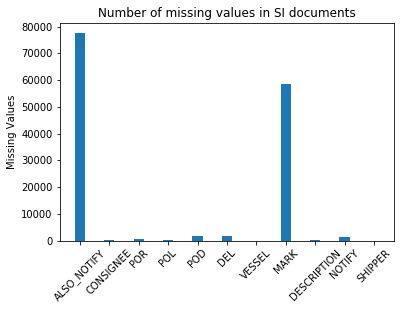

In [157]:
keys = []
values = []
for k,v in stat.iteritems():
    if k != "BKG_NO":
        keys.append(k)
        values.append(v)
ind = np.arange(len(keys))
width = 0.35
plt.bar(ind, values, width)
plt.xticks(ind, keys, rotation=45)
plt.ylabel('Missing Values')
plt.title('Number of missing values in SI documents')

In [1]:
# Phan bo chieu dai cua value ung voi tung key, min, max

In [2]:
# Phan bo chieu dai cua value tren toan dataset